# CIFAR100 - Categorical Classification
> # VGG16

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.10.0'

# I. CIFAR100 Data_Set Load

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169001437/169001437 [==============================] - 13s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [4]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [7]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((40000, 32, 32, 3), (40000, 100), (10000, 32, 32, 3), (10000, 100))

# III. Import VGG16 Model

> ## 1) conv_base

In [8]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (32, 32, 3))

58889256/58889256 [==============================] - 3s 0us/step


# IV. Keras Modeling

> ## 1) Model Define

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(100, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 100)               102500    
                                                                 
Total params: 15,342,500
Trainable params: 15,342,500
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [11]:
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.00005),
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 6분

In [12]:
%%time

Hist_model = model.fit(X_train, y_train,
                       epochs = 15,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/15
313/313 [==============================] - 30s 67ms/step - loss: 3.8951 - accuracy: 0.1193 - val_loss: 2.8432 - val_accuracy: 0.2844
Epoch 2/15
313/313 [==============================] - 19s 62ms/step - loss: 2.7424 - accuracy: 0.2986 - val_loss: 2.2153 - val_accuracy: 0.4093
Epoch 3/15
313/313 [==============================] - 20s 63ms/step - loss: 2.2556 - accuracy: 0.3994 - val_loss: 1.9560 - val_accuracy: 0.4675
Epoch 4/15
313/313 [==============================] - 21s 67ms/step - loss: 1.9397 - accuracy: 0.4742 - val_loss: 1.8478 - val_accuracy: 0.4982
Epoch 5/15
313/313 [==============================] - 20s 62ms/step - loss: 1.7160 - accuracy: 0.5250 - val_loss: 1.7333 - val_accuracy: 0.5273
Epoch 6/15
313/313 [==============================] - 20s 63ms/step - loss: 1.5231 - accuracy: 0.5722 - val_loss: 1.6727 - val_accuracy: 0.5469
Epoch 7/15
313/313 [==============================] - 20s 64ms/step - loss: 1.3469 - accuracy: 0.6130 - val_loss: 1.6450 - val_accuracy:

> ## 4) 학습 결과 시각화

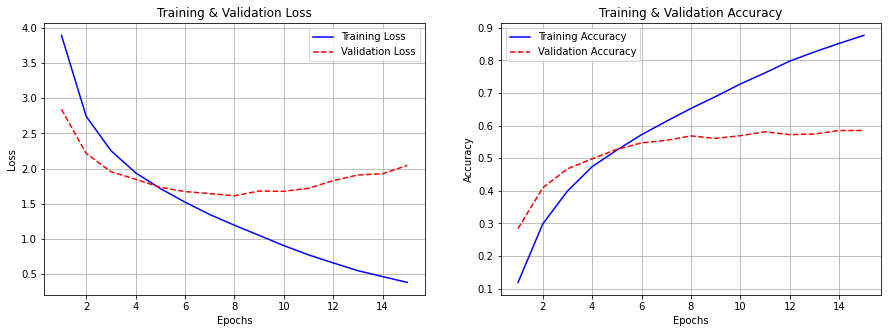

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 2.09653
Accuracy = 0.58120


# 
# 
# 
# The End
# 
# 
# 